In [1]:
# Phase 1 - Data Cleaning and EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1 - Load and Clean the Dataset
df = pd.read_csv('employee_attrition_data.csv')
df

,Employee_ID,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,0,27,Male,Marketing,Manager,9,0.586251,151,0,60132,0
1,1,53,Female,Sales,Engineer,10,0.261161,221,1,79947,0
2,2,59,Female,Marketing,Analyst,8,0.304382,184,0,46958,1
3,3,42,Female,Engineering,Manager,1,0.480779,242,0,40662,0
4,4,44,Female,Sales,Engineer,10,0.636244,229,1,74307,0
...,...,...,...,...,...,...,...,...,...,...,...
995,995,39,Female,HR,HR Specialist,3,0.377435,239,0,71403,0
996,996,50,Male,Engineering,Manager,1,0.431152,154,0,30181,1
997,997,52,Male,Engineering,Analyst,3,0.647102,206,0,64143,0
998,998,37,Female,HR,HR Specialist,2,0.304813,241,0,74383,1


In [8]:
# Removing Duplicates
df.drop_duplicates(inplace=True)


In [9]:
# Clean inconsistent entries
df['Department'] = df['Department'].str.strip().str.title()


In [10]:
# Step 2 - Exploratory Data Analysis (EDA)

# Descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

print("\nMedian:")
print(df.median(numeric_only=True))

print("\nMode:")
print(df.mode().iloc[0])

print("\nVariance:")
print(df.var(numeric_only=True))

print("\nStandard Deviation:")
print(df.std(numeric_only=True))



Descriptive Statistics:
       Employee_ID          Age  Years_at_Company  Satisfaction_Level  \
count  1000.000000  1000.000000       1000.000000         1000.000000   
mean    499.500000    42.205000          5.605000            0.505995   
std     288.819436    10.016452          2.822223            0.289797   
min       0.000000    25.000000          1.000000            0.001376   
25%     249.750000    33.000000          3.000000            0.258866   
50%     499.500000    43.000000          6.000000            0.505675   
75%     749.250000    51.000000          8.000000            0.761135   
max     999.000000    59.000000         10.000000            0.999979   

       Average_Monthly_Hours  Promotion_Last_5Years        Salary    Attrition  
count            1000.000000            1000.000000   1000.000000  1000.000000  
mean              199.493000               0.486000  64624.980000     0.495000  
std                29.631908               0.500054  20262.984333     0.50

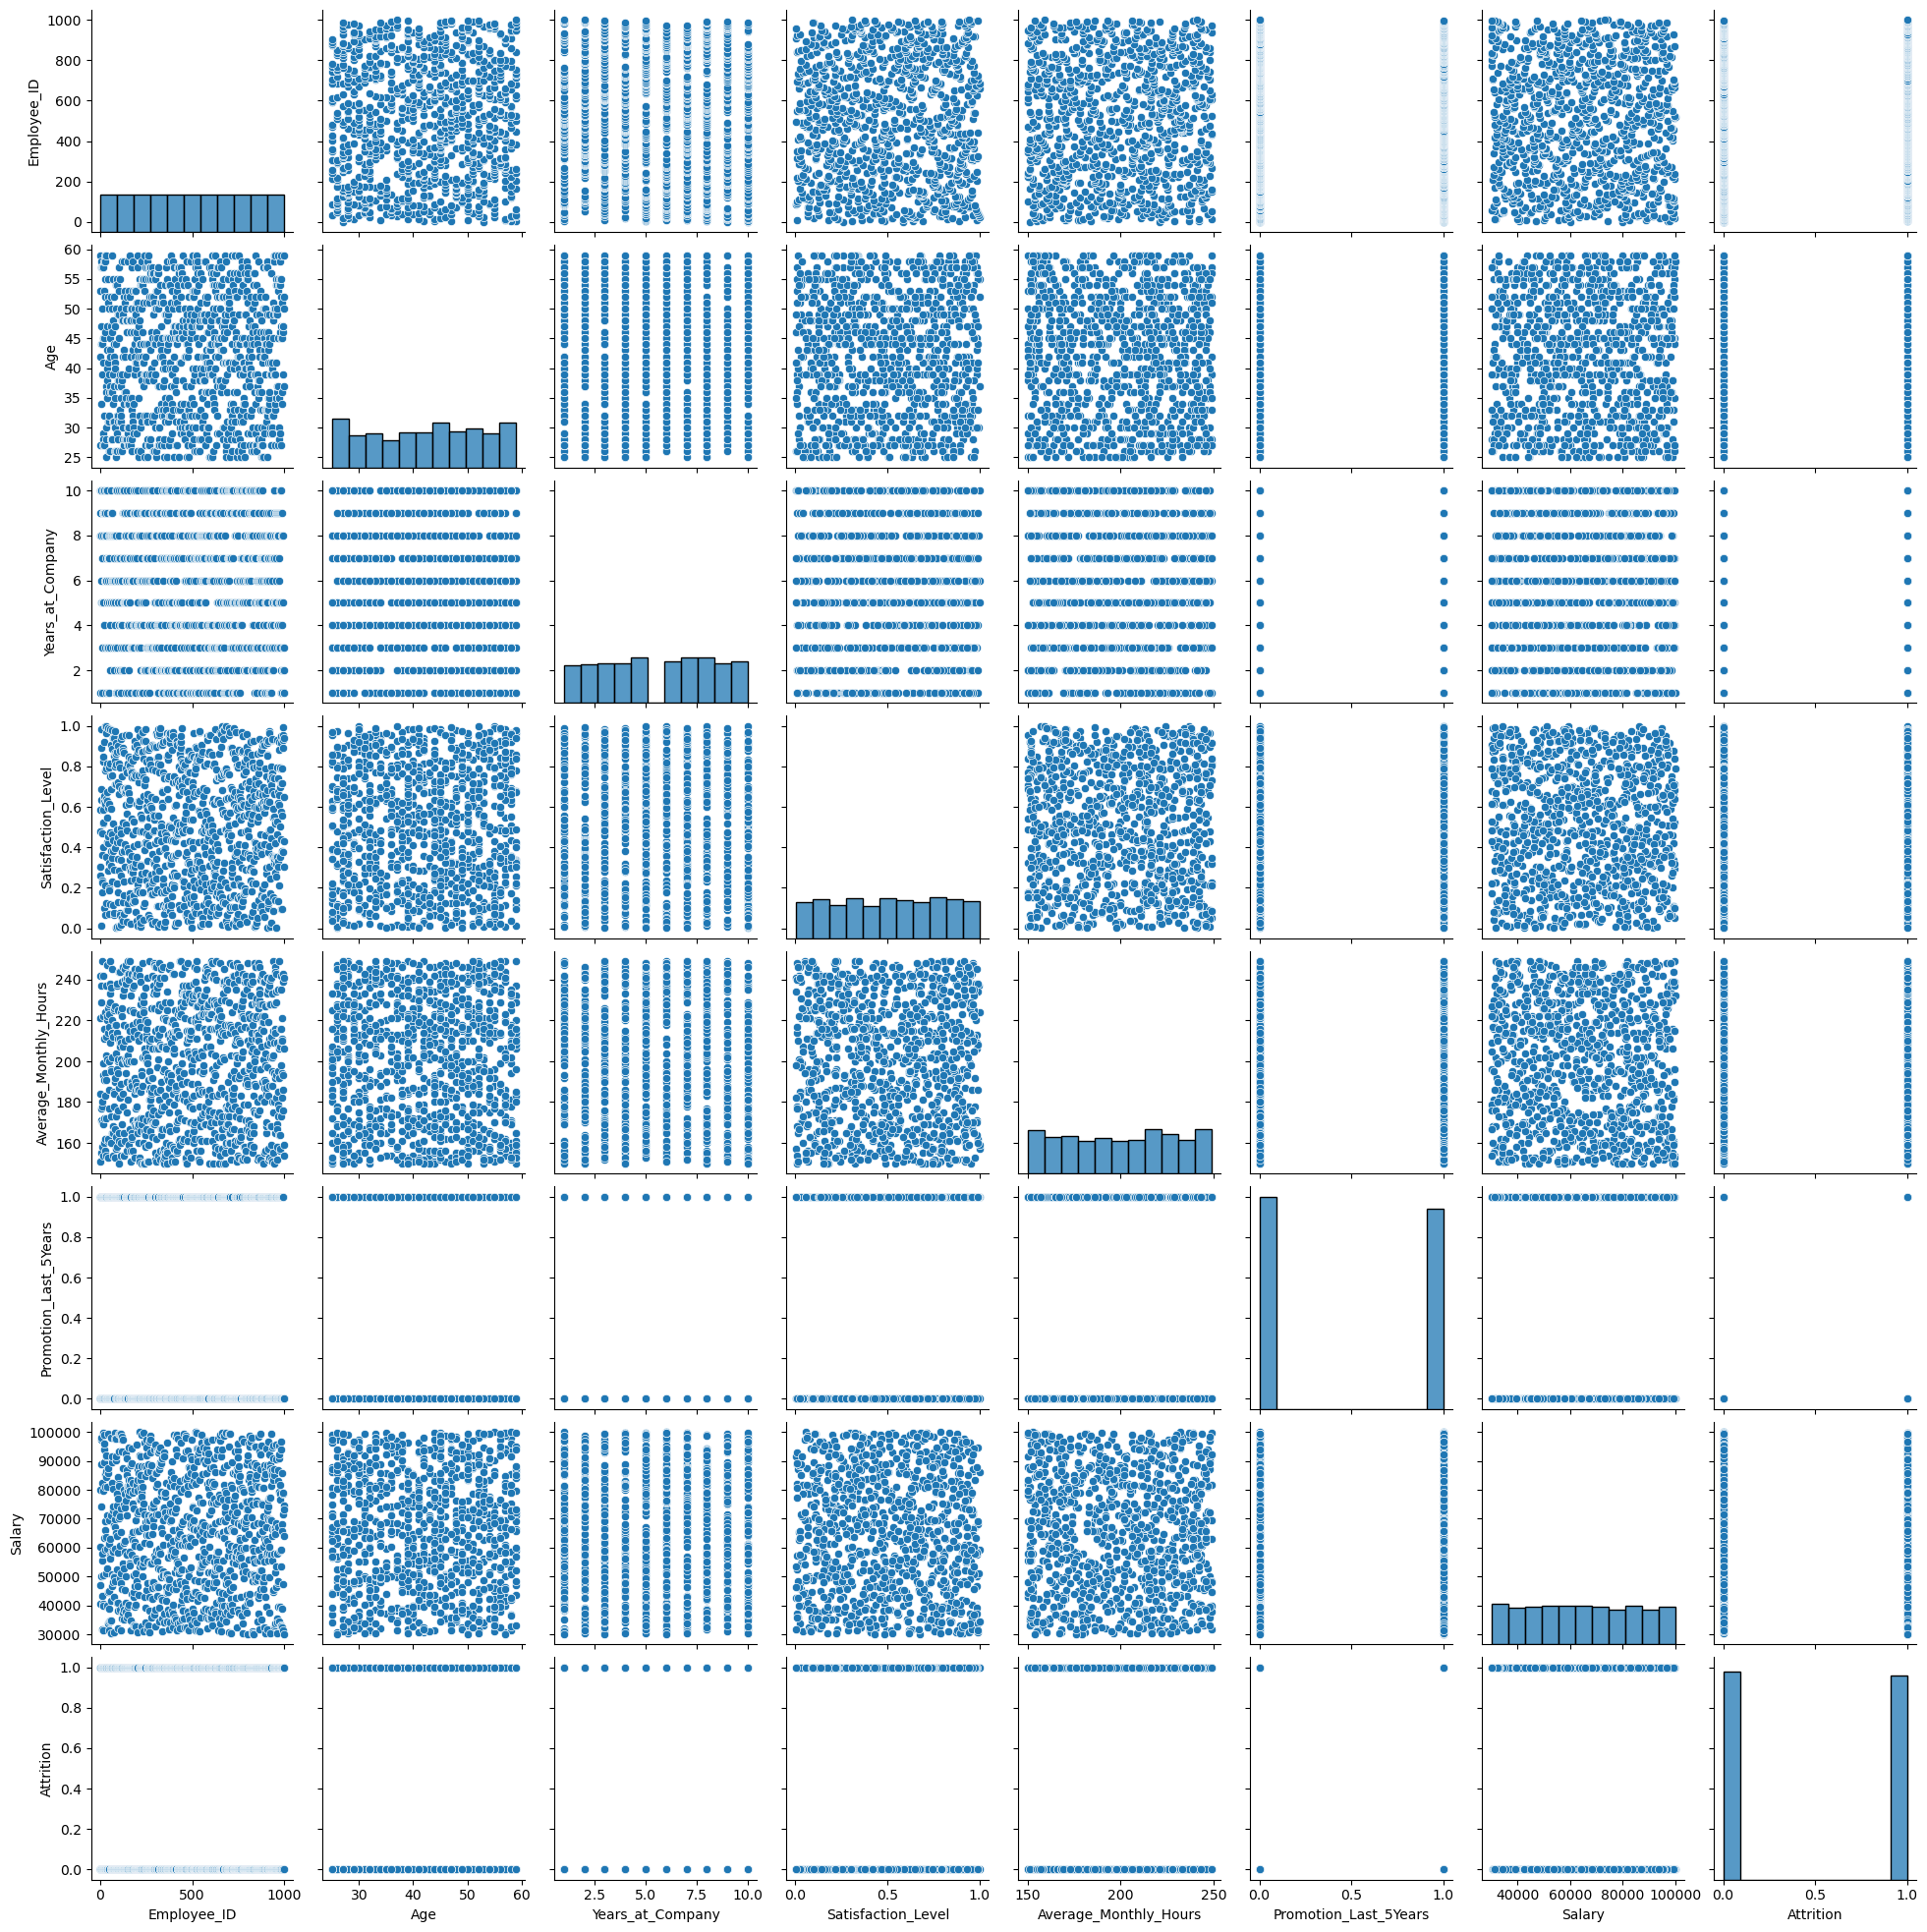

In [11]:
# Pairplot
sns.pairplot(df.select_dtypes(include='number'))
plt.show()

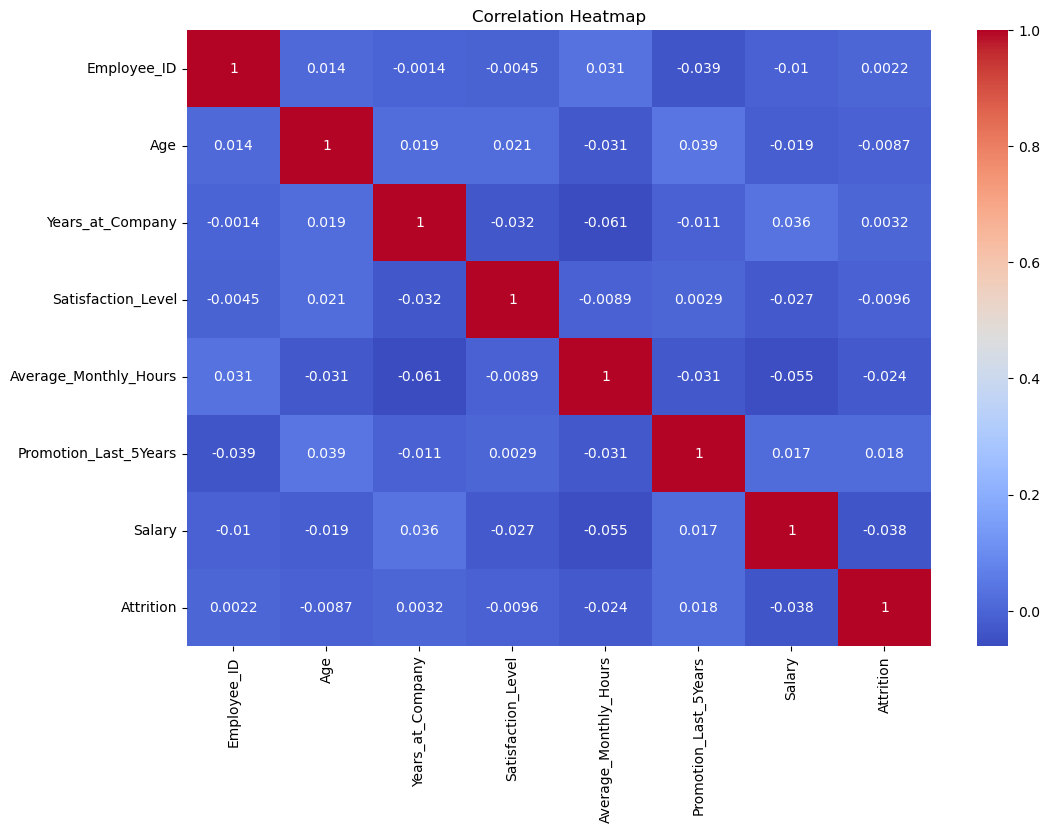

In [12]:
# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

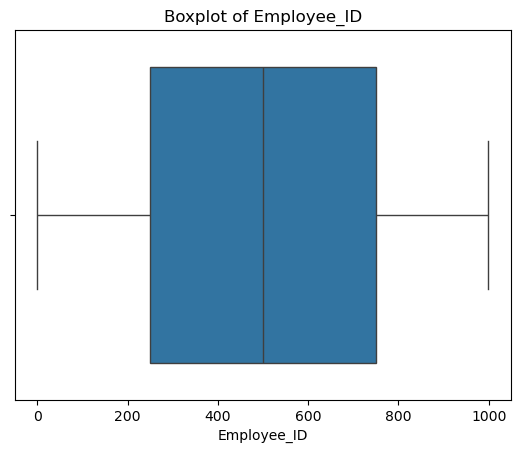

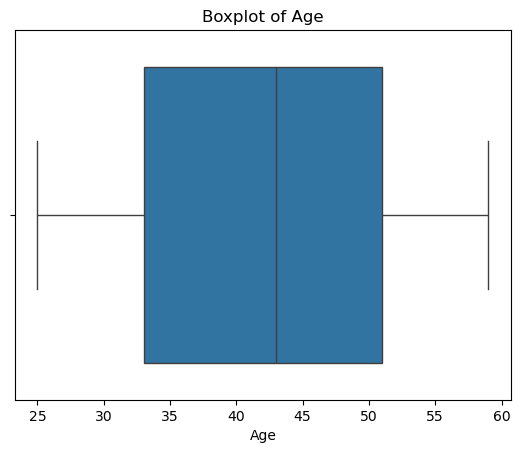

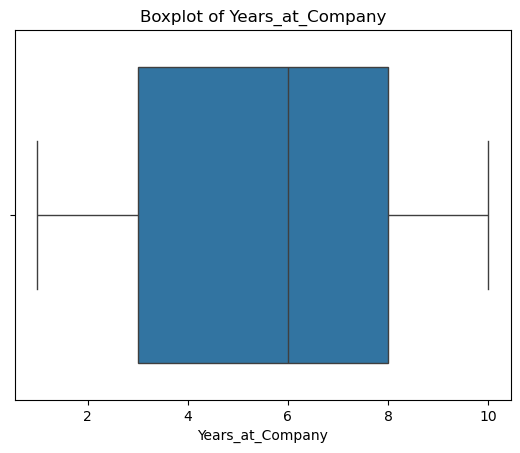

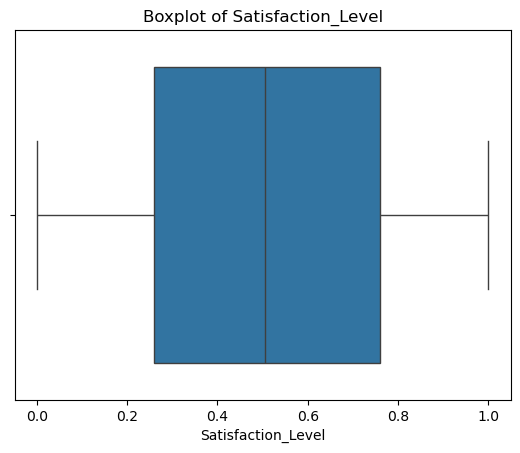

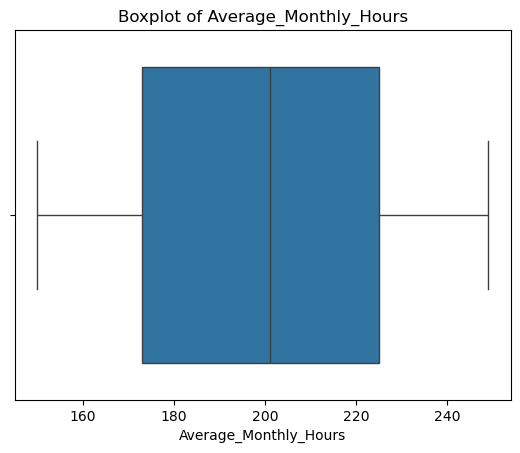

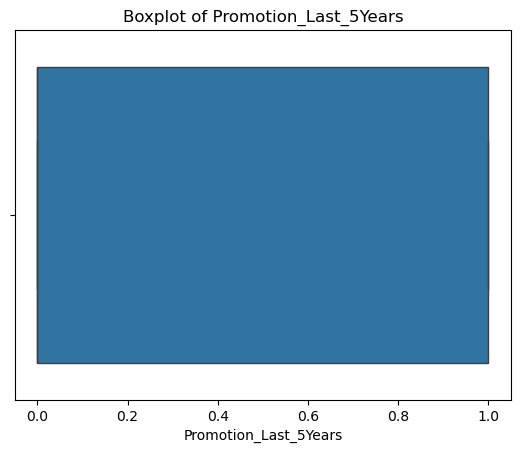

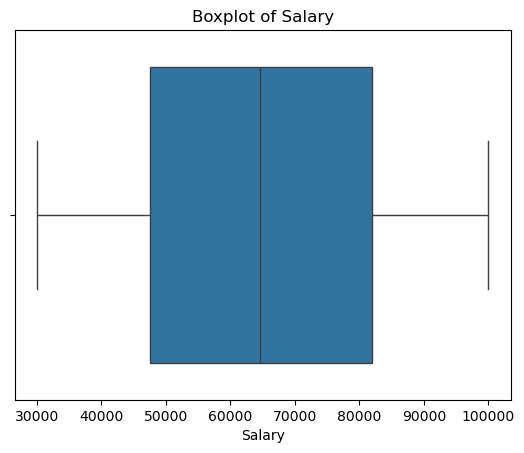

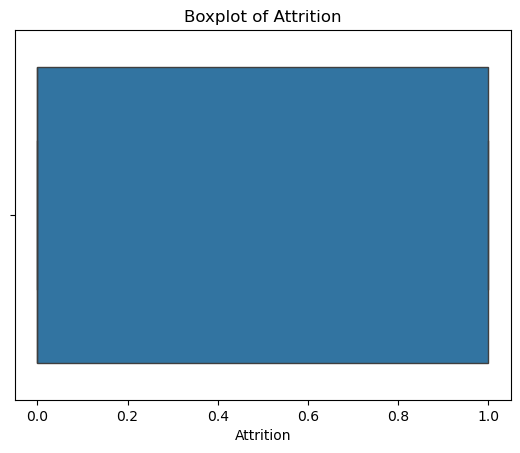

In [13]:
# Boxplots for outlier detection
num_cols = df.select_dtypes(include='number').columns
for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [16]:
# Step 3 - Probability and Statistical Analysis

# Probability of attrition by department and performance
prob_df = df.groupby(['Department', 'Salary'])['Attrition'].value_counts(normalize=True).unstack()
print("\nProbability Table:")
print(prob_df)


Probability Table:
Attrition             0    1
Department  Salary          
Engineering 30181   NaN  1.0
            30773   1.0  NaN
            30935   1.0  NaN
            31475   1.0  NaN
            32272   NaN  1.0
...                 ...  ...
Sales       99113   1.0  NaN
            99265   1.0  NaN
            99423   NaN  1.0
            99501   NaN  1.0
            99584   1.0  NaN

[998 rows x 2 columns]
